# Introduction to Python, Class 4: Data visualization

## Objectives

So far in this course, we have:

- learned basic Python syntax, including working with objects and functions
- imported data using Python for manipulation
- loaded `pandas` and used its data science tools to manipulate and filter data

The last section's material continues our explorations of tidyverse with a specific focus on data visualization.
After completing this material, 
you should be able to use `plotnine` (which implements `ggplot2` in Python) to:

- create and modify scatterplots and boxplots
- represent time series data as line plots
- split figures into multiple panels
- customize your plots

## Getting set up

Since we are continuing to work with the same data as last class, 
we need to make sure all of our data and packages are available for use.

Open your project in Jupyter Notebooks. 
While it is possible for you to download this notebook, 
add it to your project, 
and execute all commands,
we recommend typing all commands in a new notebook.
Create a new notebook called `class4.ipynb`,
add a title, 
and enter the following code with comments:

In [1]:
# load libraries
%matplotlib inline
import plotnine as p9
import pandas as pd

In [2]:
# suppress printing of warnings (for purposes of this lesson)
import warnings
warnings.simplefilter("ignore")

In [3]:
# read in filtered datasets
birth_reduced = pd.read_csv('data/birth_reduced.csv')
smoke_complete = pd.read_csv('data/smoke_complete.csv')

If you have trouble accessing your data and see an error indicating the file is not found,
it is likely one of the following problems:

1. Check to make sure your notebook is in your project directory. 
In your file browser, navigate to the location of your project directory (a single directory containing your notebooks and a folder with data). Make sure your class 4 notebook appears in this directory.
2. Make sure you have the two datasets (`birth_reduced.csv` and `smoke_complete.csv`) in your `data` directory. 
Please reference the materials from class 3 to filter the original clinical dataset and export these data.

## Intro to plotnine/ggplot and scatterplots

`plotnine` is a visualization package that implements `ggplot` code (from R statistical programming) in Python.

There are three steps to creating a ggplot.
We'll start with a scatterplot, which is used to compare quantitative (continuous) variables.

1. bind data: create a new plot with a designated dataset

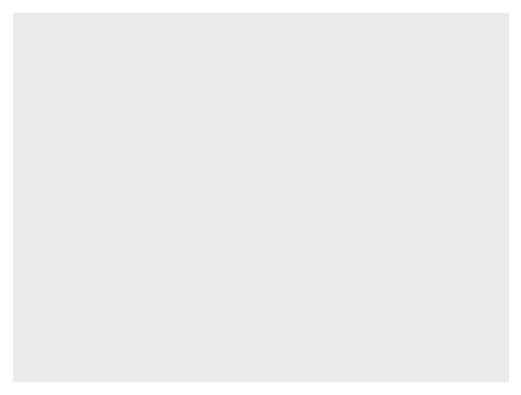

<ggplot: (-9223372029321292512)>

In [4]:
# basic ggplot: bind data to plot
(p9.ggplot(data=smoke_complete) 
    )

The last line of code creates an empty plot, 
since we didn't include any instructions for how to present the data.

2. specify the aesthetic: maps the data to axes on a plot

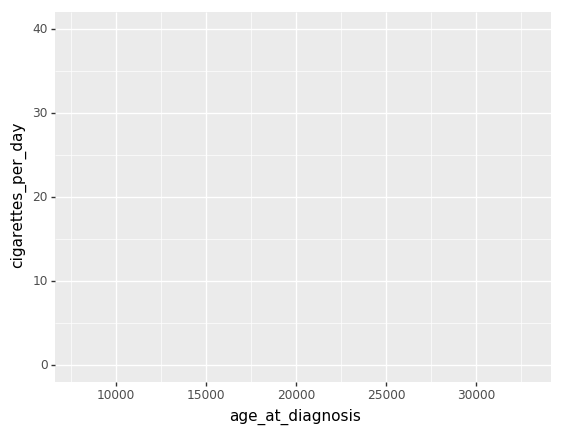

<ggplot: (280652748)>

In [5]:
# basic ggplot: specify aesthetics (axes)
(p9.ggplot(data=smoke_complete,
                         mapping=p9.aes(x='age_at_diagnosis', y='cigarettes_per_day'))
)

This adds labels to the axis, but no data appear because we haven't specified how they should be represented

3. add layers: visual representation of plot, including ways through which data are represented (geometries or shapes) and themes (anything not the data, like fonts)

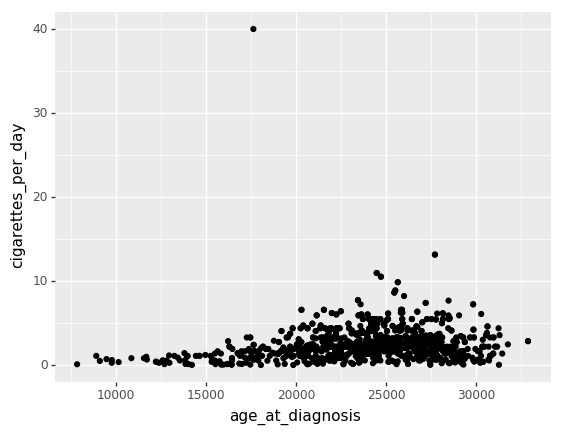

<ggplot: (7533502735)>

In [6]:
# basic ggplot: add layer
(p9.ggplot(data=smoke_complete,
                         mapping=p9.aes(x='age_at_diagnosis', y='cigarettes_per_day'))
    + p9.geom_point()
)

The plus sign (`+`) is used here to connect parts of `ggplot` code together.
The line breaks and indentation used here represents the convention for `ggplot`, 
which makes the code more readible and easy to modify.

The parentheses around the whole chunk of code is to indicate the entire chunk of code belong together, and is required for Python to interpret it correctly.

In the code above, note that we don't need to include the labels for `data =` and `mapping =`. 
It's also common to include the mapping (`aes`) in the `geom`, which allows for more flexibility in customizing 
(we'll get to this later!).

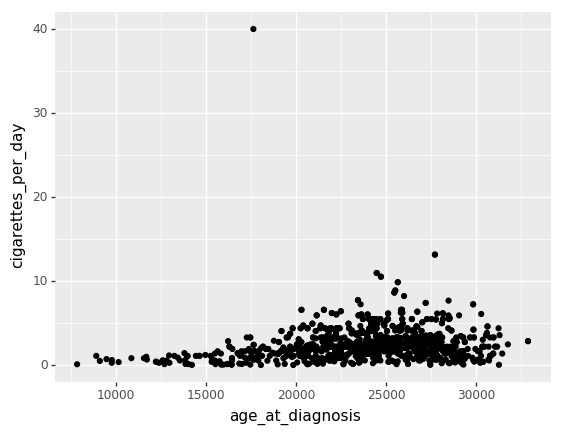

<ggplot: (7546703466)>

In [7]:
# same command, without parameters specified and with aes in the geom
(p9.ggplot(smoke_complete)
    + p9.geom_point(p9.aes(x='age_at_diagnosis', y='cigarettes_per_day'))
)

This plot is identical to the previous plot, despite the differences in code.

## Customizing plots

Now that we have the data generally displayed the way we'd like, we can start to customize a plot.

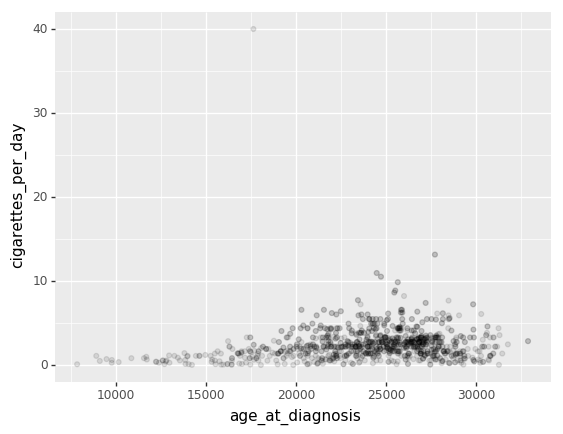

<ggplot: (-9223372029321182618)>

In [8]:
# add transparency with alpha
(p9.ggplot(smoke_complete)
    + p9.geom_point(p9.aes(x='age_at_diagnosis',
        y='cigarettes_per_day'), alpha=0.1)
)

Transparency is useful to help see the distribution of data, 
especially when points are overlapping.

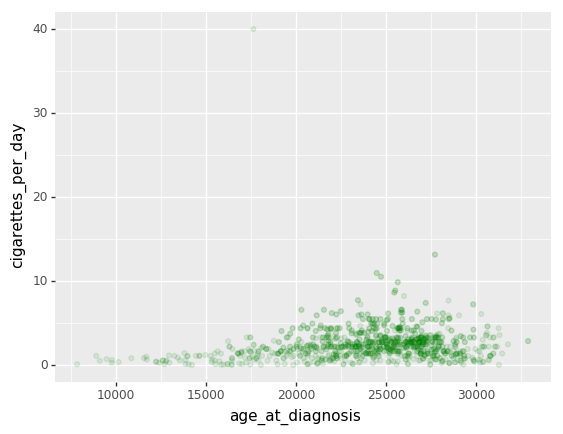

<ggplot: (-9223372029321120119)>

In [9]:
# change color of points
(p9.ggplot(smoke_complete)
 + p9.geom_point(p9.aes(x='age_at_diagnosis', y='cigarettes_per_day'), color='green',
                 alpha=0.1)
)

For more information on colors available, look [here](http://sape.inf.usi.ch/quick-reference/ggplot2/colour).

We can also color points based on another (usually categorical) variable:

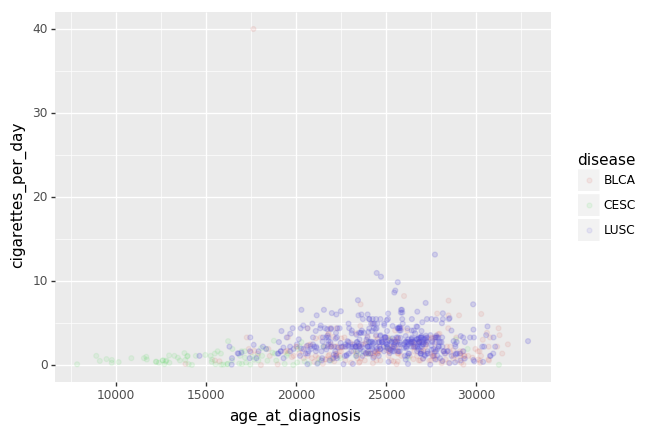

<ggplot: (-9223372029321041464)>

In [10]:
# plot disease by color
(p9.ggplot(smoke_complete)
    + p9.geom_point(p9.aes(x='age_at_diagnosis',
        y='cigarettes_per_day',
        color = 'disease'), alpha=0.1)
    )

Note the location of `color=` with the other aesthetics.

Coloring by a variable automatically adds a legend as well.

We can also change the general appearance of the plot (background colors and fonts):

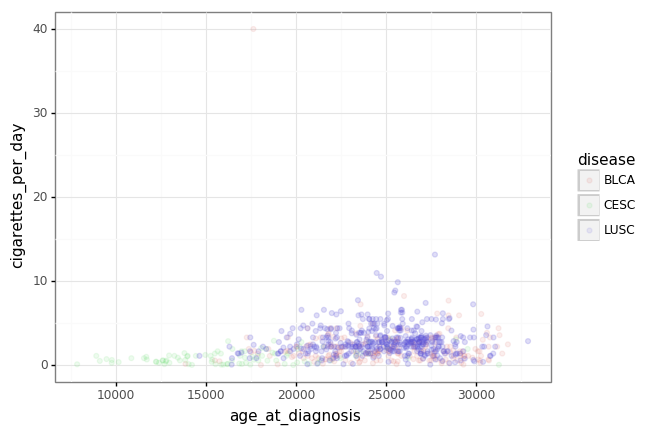

<ggplot: (7533867882)>

In [11]:
# change background theme
(p9.ggplot(smoke_complete)
    + p9.geom_point(p9.aes(x='age_at_diagnosis',
        y='cigarettes_per_day',
        color = 'disease'), alpha=0.1)
    + p9.theme_bw()
    )

This adds another layer to our plot representing a black and white theme.
A complete list of pre-set themes is available [here](https://ggplot2.tidyverse.org/reference/ggtheme.html), 
and we'll cover ways to customize our own themes later in this lesson.

While the axes are currently sufficient, 
they aren't particularly attractive.
We can add a title and replace the axis labels using `labs`:

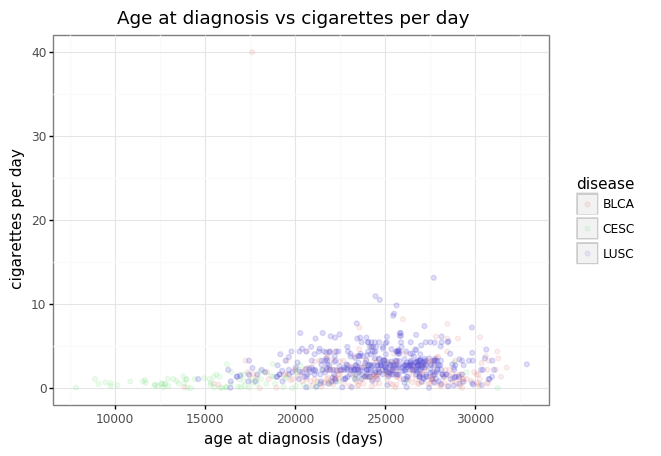

<ggplot: (-9223372029320905272)>

In [12]:
# add title and custom axis labels
(p9.ggplot(smoke_complete)
    + p9.geom_point(p9.aes(x='age_at_diagnosis',
        y='cigarettes_per_day',
                           color = 'disease'), alpha=0.1)
    + p9.labs(title="Age at diagnosis vs cigarettes per day", # title
              x="age at diagnosis (days)", # x axis
              y="cigarettes per day") # y axis
    + p9.theme_bw()
    )

Another common feature to customize involves the orientation and appearance of fonts.
While this can be controlled by default themes like `theme_bw)`, 
you can also control different parts independently. 
For example, we can make a dramatic modification to all text in the plot:

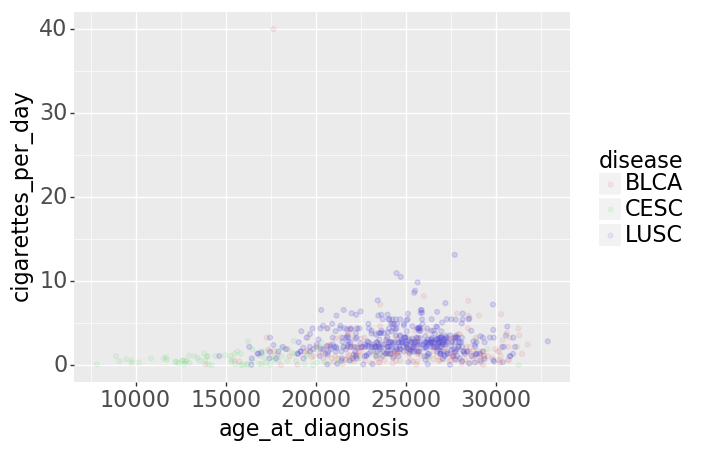

<ggplot: (-9223372029320907218)>

In [13]:
# change font size
(p9.ggplot(smoke_complete)
    + p9.geom_point(p9.aes(x='age_at_diagnosis', y='cigarettes_per_day', 
                           color = 'disease'), 
                    alpha=0.1)
    + p9.theme(text=p9.element_text(size=16)) # increase size of all text
)

Alternatively, you can alter only one specific type of text:

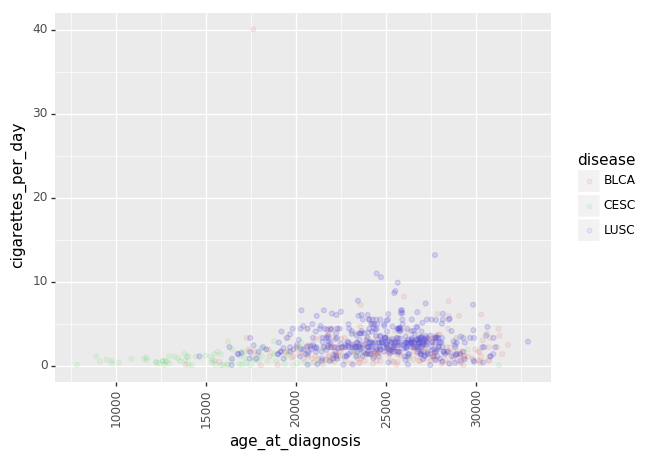

<ggplot: (-9223372029320509980)>

In [14]:
# manipulate text
(p9.ggplot(smoke_complete)
    + p9.geom_point(p9.aes(x='age_at_diagnosis', y='cigarettes_per_day', 
                           color = 'disease'), 
                    alpha=0.1)
    + p9.theme(axis_text_x=p9.element_text(angle = 90)) # rotate x axis text
)

This rotates and adjusts the horizontal and vertical arrangement of the labels on only the x axis.
Of course, you can also modify other text (y axis, axis labels, legend).

After you're satisfied with a plot, 
it's likely you'd want to share it with other people or include in a manuscript or report.

In [15]:
# assign last plot plot to object
my_plot = (p9.ggplot(smoke_complete)
    + p9.geom_point(p9.aes(x='age_at_diagnosis', y='cigarettes_per_day', 
                           color = 'disease'), 
                    alpha=0.1)
    + p9.theme(axis_text_x=p9.element_text(angle = 90, 
                                           hjust = 0.5, 
                                           vjust = 0.5)) # rotate and adjust x axis text
)

# save to file 
my_plot.save("scatterplot.png", width=10, height=10, dpi=300)

You can view your `figures/` directory to see the exported jpeg file.
This command interprets the file format for export using the file suffix you specify. 
The other arguments dictate the size (`width` and `height`) and resolution (`dpi`).

**Challenge:**
Create a scatterplot showing age at diagnosis vs years smoked with points colored by gender and appropriate axis labels

## Box and whisker plots

Box and whisker plots compare the distribution of a quantitative variable among categories.

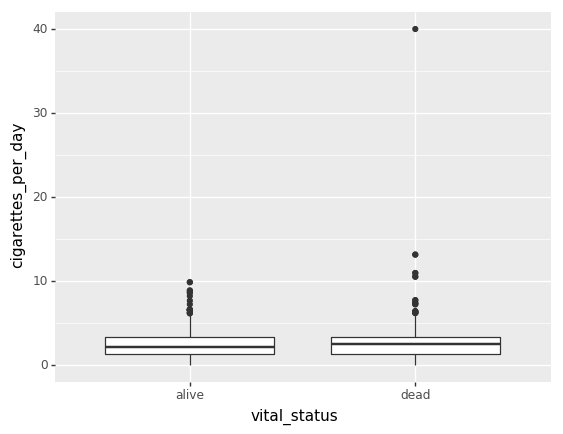

<ggplot: (-9223372029308072199)>

In [16]:
# creating a box and whisker plot
(p9.ggplot(smoke_complete)
    + p9.geom_boxplot(p9.aes(x='vital_status',
                          y='cigarettes_per_day'))
    )

The main differences from the scatterplots we created earlier are the `geom` type and the variables plotted.

We can change the color similarly to scatterplots:

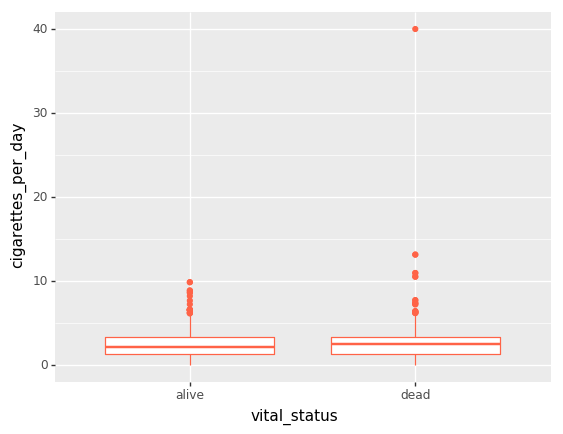

<ggplot: (7546863992)>

In [17]:
# adding color
(p9.ggplot()
    + p9.geom_boxplot(smoke_complete,
           p9.aes(x='vital_status',
                          y='cigarettes_per_day'), color="tomato")
    )

It seems weird to change the color of the entire box, though. 
A better option would be to add colored points to a black box and whisker plot:

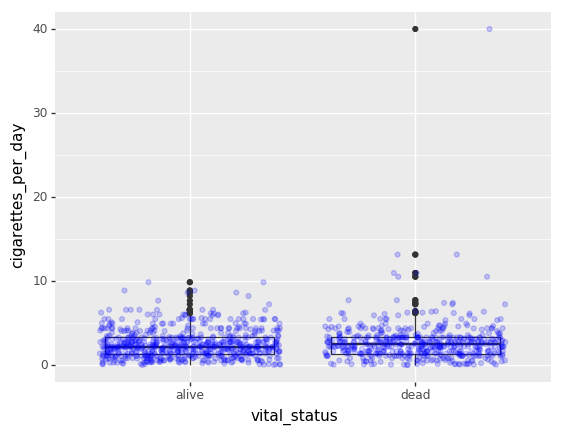

<ggplot: (7552123512)>

In [18]:
# adding colored points to black box and whisker plot
(p9.ggplot(smoke_complete)
    + p9.geom_boxplot(p9.aes(x='vital_status',
                          y='cigarettes_per_day'))
    + p9.geom_jitter(p9.aes(x='vital_status',
                          y='cigarettes_per_day'), 
                     alpha=0.2, color="blue")
    )

Jitter references a method of randomly offsetting points slightly to allow them to be seen and interpreted more easily. 

This method, however, effectively duplicates some data points, since all points are shown with jitter and the boxplot shows outliers. You can use an option in `geom_boxplot` to suppress plotting of outliers:

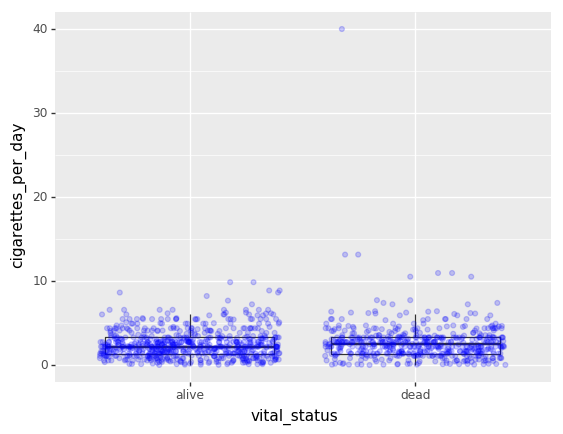

<ggplot: (7552138616)>

In [19]:
# boxplot with both boxes and points
(p9.ggplot(smoke_complete)
    + p9.geom_boxplot(p9.aes(x='vital_status',
                          y='cigarettes_per_day'),
                     outlier_alpha = 0) # make outliers completely transparent
    + p9.geom_jitter(p9.aes(x='vital_status',
                          y='cigarettes_per_day'), 
                     alpha=0.2, color="blue")
    )

**Challenge:** 
Write code comments for each of the following lines of code. 
What is the advantage of writing code like this? 

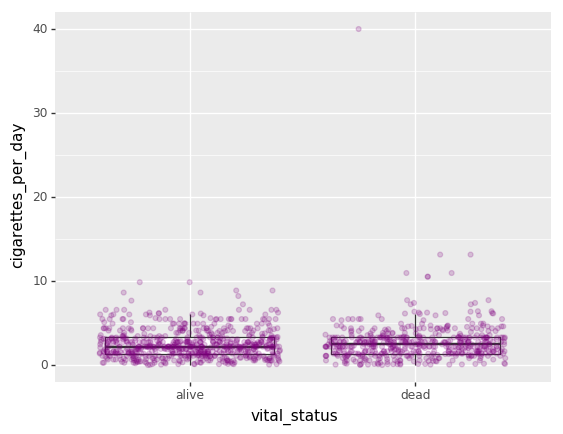

<ggplot: (7546864753)>

In [20]:
my_plot = p9.ggplot(smoke_complete, p9.aes(x='vital_status', y='cigarettes_per_day'))
(my_plot 
    + p9.geom_boxplot(outlier_alpha=0)
    + p9.geom_jitter(alpha=0.2, color='purple')
)

**Challenge:** 
Does the order of layers in the last plot matter? What happens if `jitter` is coded before `boxplot`? 

## Time series data as line plots

So far we've been able to work with the data as it appears in our filtered dataset.
Now that we're moving on to time series plots (changes in variables over time),
we need to manipulate the data.
We'll also be working with the `birth_reduced` dataset,
which we created in the last class (primarily by removing all missing data for year of birth).
We'd like to plot the number of individuals in the dataset born by year,
so we need to first count our observations based on both disease and year of birth:

In [21]:
# count number of observations for each disease by year of birth
yearly_counts = birth_reduced.groupby(['year_of_birth', 'disease'])['disease'].count()
yearly_counts.head()

year_of_birth  disease
1902.0         BRCA       1
1909.0         BRCA       1
1910.0         BRCA       1
1912.0         LGG        1
1913.0         BRCA       1
Name: disease, dtype: int64

In the output above, both year and vital status are row indexes.
We can reset the index as follows:

In [22]:
# reset the index
yearly_counts = yearly_counts.reset_index(name='counts')
yearly_counts.head()

,year_of_birth,disease,counts
0,1902.0,BRCA,1
1,1909.0,BRCA,1
2,1910.0,BRCA,1
3,1912.0,LGG,1
4,1913.0,BRCA,1


We can plot these data as a single line:

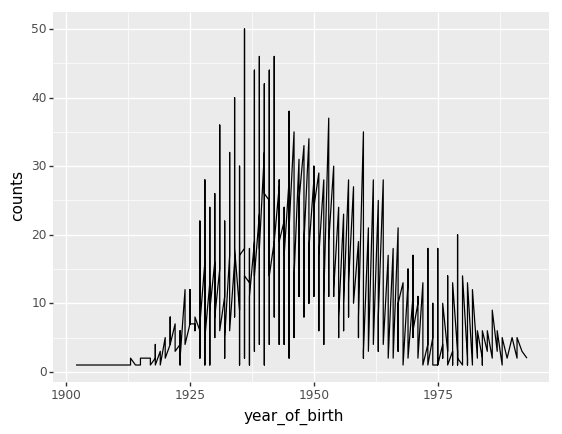

<ggplot: (-9223372029302643207)>

In [23]:
# plot all counts by year
(p9.ggplot(yearly_counts,
           p9.aes(x='year_of_birth',
                          y='counts'))
    + p9.geom_line()
    )

Here, `n` represents the number of patients born in each year,
from the count table created above.
The result isn't very satisfying, because we also grouped by disease.
We can improve this by plotting each disease on a separate line, 
which is more appropriate when there are multiple data points per year:

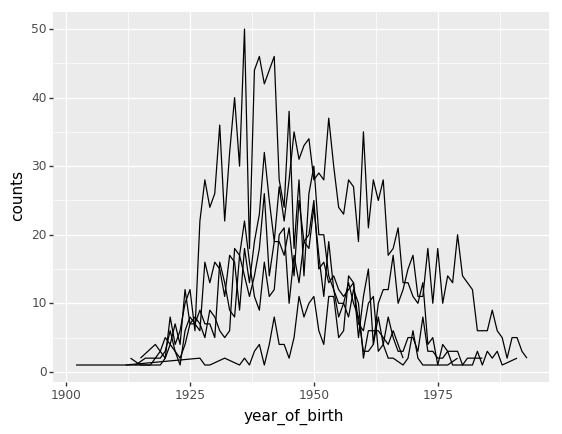

<ggplot: (7552127920)>

In [24]:
# plot one line per cancer type
(p9.ggplot(yearly_counts)
    + p9.geom_line(p9.aes(x='year_of_birth',
                          y='counts',
                          group='disease'))
    )

Moreover, we can color each line individually:

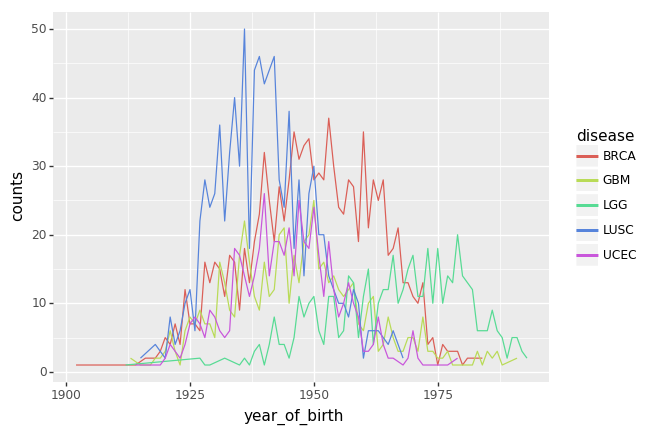

<ggplot: (-9223372029307917813)>

In [25]:
# plot one line per cancer type
(p9.ggplot(yearly_counts)
    + p9.geom_line(p9.aes(x='year_of_birth',
                          y='counts',
                          color='disease'))
    )

Note that you don't have to include a separate argument for `group = disease` because grouping is assumed by `color = disease`.

**Challenge:** 
Create a line plot for year of birth and number of patients with lines representing each gender.
Hint: you'll need to manipulate the `birth_reduced` dataset first.

**Challenge:** 
How do you show differences in lines using dashes/dots instead of color?

## Faceting

So far we've been working on building single plots,
which can show us two main variables (for the x and y axes)
and additional variables using color (and potentially size/shape/etc).
Scientific visualizations often need to compare among categories 
(e.g., control vs various treatments),
which is generally clearer if those categories are presented in separate panels.
ggplot provides this capacity through faceting.

Let's revisit the scatterplot we initially created,
plotting age at diagnosis by cigarettes per day,
with points colored by disease.
We add an additional layer to create facets, or separate panels,
for a given variable 
(in this case, the same variable being used to color points):

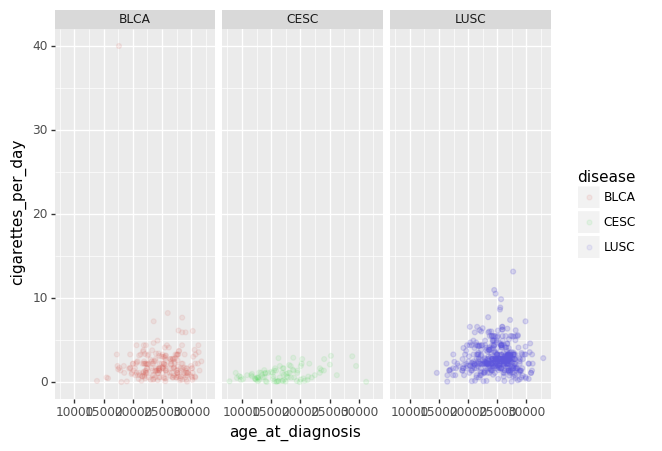

<ggplot: (7533830541)>

In [26]:
# use previous scatterplot, but separate panels by disease
(p9.ggplot(smoke_complete)
    + p9.geom_point( p9.aes(x='age_at_diagnosis',
        y='cigarettes_per_day',
        color='disease'), alpha=0.1)
    + p9.facet_wrap('disease')
    )

`facet_wrap` determines how many rows and columns of panels are needed to create the most square-shaped final plot possible.
This becomes useful when there are many more categories:

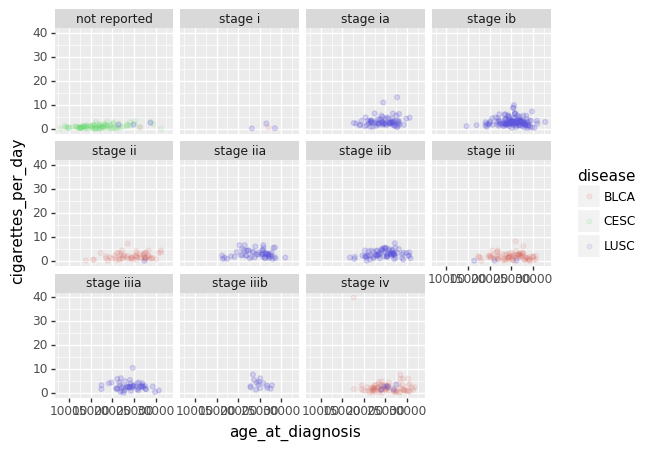

<ggplot: (-9223372029320624822)>

In [27]:
# use previous scatterplot, but separate panels by disease
(p9.ggplot(smoke_complete)
    + p9.geom_point( p9.aes(x='age_at_diagnosis',
        y='cigarettes_per_day',
        color='disease'), alpha=0.1)
    + p9.facet_wrap('tumor_stage')
    )

In this case, we're now visualizing an additional variable (tumor stage), 
in addition to the original three (age at diagnosis, cigarettes per day, and disease).

If you want to control the specific layout of panels, you can use `facet_grid` instead of `facet_wrap`:

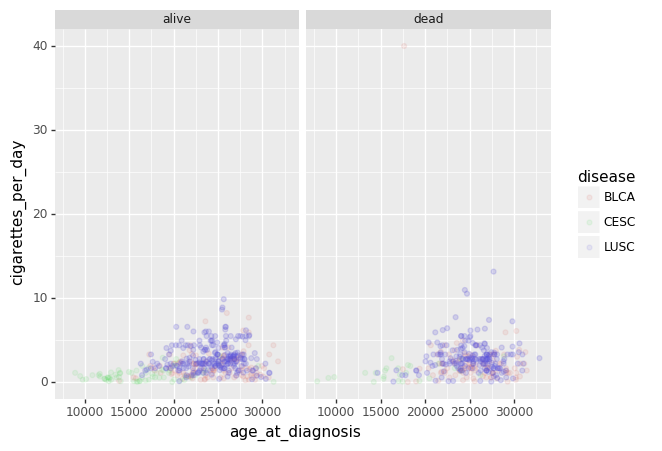

<ggplot: (-9223372029320947410)>

In [28]:
# scatterplots with panels for vital status in one row
(p9.ggplot(smoke_complete)
    + p9.geom_point( p9.aes(x='age_at_diagnosis',
        y='cigarettes_per_day',
        color='disease'), alpha=0.1)
    + p9.facet_grid('. ~ vital_status')
)

The tilde (`~`) is a symbol used to indicate a formula;
in this case, it indicates a plot be created with vital status in one row.
This method can also plot panels in columns (e.g., `vital_status ~ .`).

We may want to show interactions between two categorical variables,
by arranging panels into rows according to one variable and columns according to another:

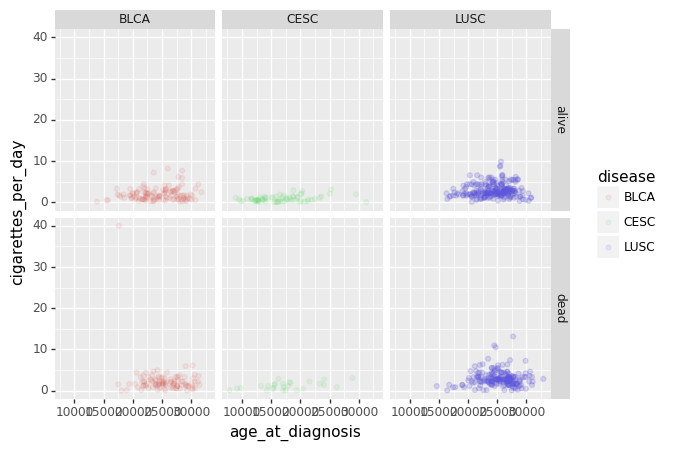

<ggplot: (-9223372029320967869)>

In [29]:
# add another variable using faceting
(p9.ggplot(smoke_complete)
    + p9.geom_point( p9.aes(x='age_at_diagnosis',
        y='cigarettes_per_day',
        color='disease'), alpha=0.1)
    + p9.facet_grid('vital_status ~ disease')
    )

Don't forget to look at the help documentation (e.g., `?facet_grid`) to learn more about additional ways to customize your plots!

**Challenge:** Alter your last challenge plot of (birth year by number of patients) to show each gender in separate panels.

**Challenge**: How do you change axis formatting, like tick marks and lines?
Hint: You may want to use Google!

## Wrapping up

This class' material introduced you to ggplot as a tool for data visualization, 
allowing you to now create publication-quality images using Python code.
If you are interested in learning more about data visualization, 
documentation for all `plotnine` features is available [here](https://plotnine.readthedocs.io/en/stable/index.html).

If you would like more practice, 
the [`exercises`](exercises/) directory contains additional tasks for practice.
Answers to those and in-class questions are available in the [`solutions`](solutions/) directory. 

In this introductory course, 
we explored basic principles of Python syntax, 
importing and extracting data,
manipulating data using pandas,
and data visualization.
You should be equipped to begin applying Python to your own research needs. 
For additional resources to continue your work with Python, 
please see the [Training, Community, and Finding Help](https://sciwiki.fredhutch.org/scicomputing/reference_training/) page on the Fred Hutch Biomedical Data Science Wiki.